# Bridging the Gap in E-Mobile Money Adoption: A Data-Driven Approach to Identify and Address Underlying Challenges in Tanzania - Group 04

**Understanding the problem**

<ol>
<li>
  Identify Factors Affecting Adoption

  <ol>
    <li>Socio-Economic</li>
    <li>Education</li>
    <li>Technological</li>
    <li>Infrastractural</li>
  </ol>
</li>

<li>Propose Interventions to Address these challenges</li>
</ol>



## ***What we have done?***

1. Data collection and Cleaning
2. Feature selection
3. Feature engineering
4. Exploratory Data Analysis
  - Correlation Analysis
  - Data Visualization
5. Model development: model relationships in data
6. What-if analysis for proposed interventions
7. Report preparation

**Load Python packages**

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot stylesheet
plt.style.use('bmh')


**Load Finscope dataset**

In [46]:
# Load Finscope Survey 2023 Data
data = pd.read_csv('./FinScope_Data/Individual Main Data/FinScope Tanzania 2023_Individual Main Data_FINAL.csv')
data.head()

,SN,reg_name,reg_code,dist_code,dist_name,ward_code1,ward_name,ea_code,clustertype,c1,...,SOCIAL_GROUPS,OTHER_FORMAL,OVERALL_FORMAL,INFORMAL,fasx,overlapx,IncomeMain,BusO,DEDICATED_FARMER,SMALLHOLDER_FARMER
0,4529,Mwanza,19,7,Misungwi,251,Mondo,4,Rural,Original,...,Not SOCIAL_GROUPS,OTHER_FORMAL,OVERALL_FORMAL,INFORMAL incl SACCO AND CMG RISK CONTRIBUTIONS,Other formal non-bank,informal AND formal,Farmers and fishers,nor,Not Dedicated farmer,Not Smallholder farmer
1,4245,Kagera,18,7,Missenyi,11,Kakunyu,1,Rural,Original,...,Not SOCIAL_GROUPS,OTHER_FORMAL,OVERALL_FORMAL,INFORMAL incl SACCO AND CMG RISK CONTRIBUTIONS,Other formal non-bank,informal AND formal,Farmers and fishers,nor,Not Dedicated farmer,Not Smallholder farmer
2,8149,Mbeya,12,3,Kyela,283,Nkuyu,301,Urban,Original,...,Not SOCIAL_GROUPS,OTHER_FORMAL,OVERALL_FORMAL,INFORMAL incl SACCO AND CMG RISK CONTRIBUTIONS,Other formal non-bank,informal AND formal,Piece work/casual labor,nor,Not Dedicated farmer,Not Smallholder farmer
3,6763,Dodoma,1,3,Kongwa,123,Kibaigwa,301,Urban,Original,...,Not SOCIAL_GROUPS,OTHER_FORMAL,OVERALL_FORMAL,INFORMAL incl SACCO AND CMG RISK CONTRIBUTIONS,Other formal non-bank,informal AND formal,Traders - non-agricultural,Business owners,Not Dedicated farmer,Not Smallholder farmer
4,7805,Dar es Salaam,7,2,Ilala,252,Majohe,29,Urban,Original,...,Not SOCIAL_GROUPS,OTHER_FORMAL,OVERALL_FORMAL,INFORMAL incl SACCO AND CMG RISK CONTRIBUTIONS,Other formal non-bank,informal AND formal,Farmers and fishers,nor,Not Dedicated farmer,Not Smallholder farmer


**Selecting predictor variables and target variable**

From our dataset, we have data indicating respondent uses one of Mobile Money services; Mpesa, Tigopesa, Airtelmoney etc

<table>
  <tr><th>Column</th><th>Label</th><tr>
  <tr>
    <td>mob8_1</td>
    <td>Mpesa</td>
  <tr>
  <tr>
    <td>mob8_2</td>
    <td>Tigo-pesa</td>
  <tr>
  <tr>
    <td>mob8_3</td>
    <td>Halo-pesa</td>
  <tr>
  <tr>
    <td>mob8_4</td>
    <td>Ezy-pesa</td>
  <tr>
  <tr>
    <td>mob8_5</td>
    <td>Airtel money</td>
  <tr>
  <tr>
    <td>mob8_6</td>
    <td>T-pesa</td>
  <tr>
</table>

We feature engineer a new column `usesMobileMoney` which is `True` if respondent uses any of the mobile money services and `False` otherwise

**Perform EDA to demonstrate initial relationships**

1. Given variables indicating usage of either one of the major Mobile Money providers;
  - Mpesa,
  - Tigopesa,
  - AirtelMoney,
  - Halopesa,
  - Tpesa, and
  - Zpesa
  
    Combine them into an aggregate metric `usesMobileMoney` which is:
      `True` if respondent responded Yes to using any of the providers,
      else `False`.
    
    This will be our first indicator variable `y1`

2. Given response on frequency of mobile money usage `lastMobileMoneyUsage` we can also use this as a second indicator variable `y1` on last mobile money usage

In [47]:
# 1. Define indicator variable y1 into one variable `usesMobileMoney` of type boolean
data.loc[:, 'usesMobileMoney'] = data['mob2'].apply(lambda x: x == 'Yes')

# 2. Define indicator variable y2 into `lastMobileMoneyUsage` as an ordinal variable
last_mobile_money_usage_map = {
    'Yesterday/today': 1,
    'In the past 7 days': 2,
    'In the past 30 days': 3,
    'In the past 90 days': 4,
    'In the past 6 months': 5,
    'Longer than 6 months ago': 6,
    ' ': 7, # No Use
}
data.loc[:, 'lastMobileMoneyUsage'] = data['mob9_2'].map(last_mobile_money_usage_map)


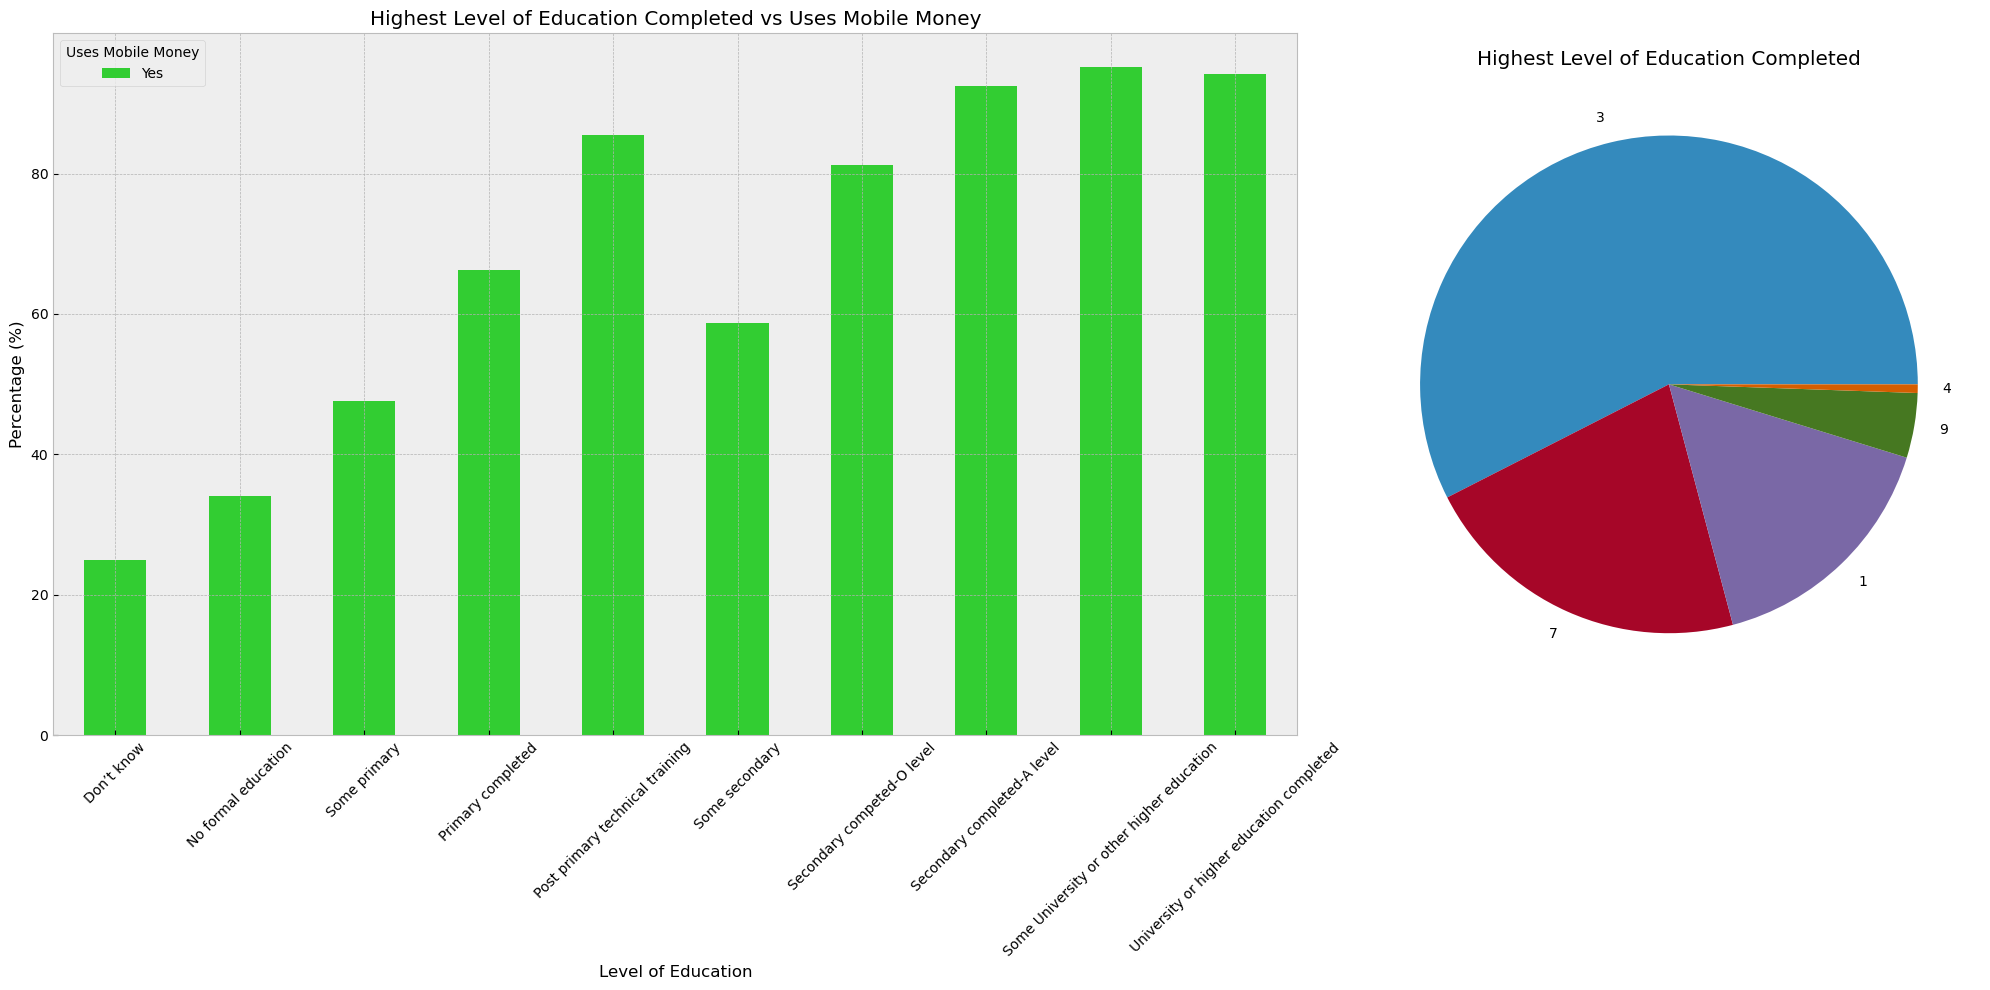

In [48]:
# Define the ordinal mapping based on the defined order
edu_level_ordinal_mapping = {
    'Don’t know': 0, # Treat 'Don’t know' as NaN
    'No formal education': 1,
    'Some primary': 2,
    'Primary completed': 3,
    'Post primary technical training': 4,
    'Some secondary': 5,
    'Secondary competed-O level': 6,
    'Secondary completed-A level': 7,
    'Some University or other higher education': 8,
    'University or higher education completed': 9,
}

# Apply the mapping to the 'c11' column
data.loc[:, 'highestLevelOfEducation'] = data['c11'].map(edu_level_ordinal_mapping)

# 2. Prepare a bar chart of `levelOfEducation` percentages
edu_level_data = data.groupby(['highestLevelOfEducation', 'usesMobileMoney']).size().unstack()

# Replace count with percentages
edu_level_data = edu_level_data.div(edu_level_data.sum(axis=1), axis=0) * 100

# replace True and False with `Yes` and `No` labels
edu_level_data.columns = ['No', 'Yes']

# Replace the numbers with their corresponding labels
edu_level_data.index = edu_level_data.index.map({v: k for k, v in edu_level_ordinal_mapping.items()})


# Summarized Map
edu_level_summarized_ordinal_mapping = {
    0: 'No formal education', # Treat 'Don’t know' as No formal Educa
    1: 'No formal education',
    2: 'Primary',
    3: 'Primary',
    4: 'Post-primary technical',
    5: 'Secondary',
    6: 'Secondary',
    7: 'Secondary',
    8: 'Post Secondary higher',
    9: 'Post Secondary higher',
}
data.loc[:, 'highestLevelOfEducationSummarized'] = data['c11'].map(edu_level_ordinal_mapping).map(edu_level_summarized_ordinal_mapping)

# Prepare pie chart of education level summarized
edu_level_summarized_data = data['highestLevelOfEducationSummarized'].value_counts()

# Sort and Replace the numbers with their corresponding labels
edu_level_summarized_data.index = edu_level_summarized_data.index.map({v: k for k, v in edu_level_summarized_ordinal_mapping.items()})


# Adjust the subplots to a 1x2 grid
fig, axs = plt.subplots(1, 2, figsize=(20, 10), gridspec_kw={'width_ratios': [2, 1]})
edu_level_data['Yes'].plot(kind='bar', ax=axs[0], color=['limegreen'])
axs[0].set_title('Highest Level of Education Completed vs Uses Mobile Money')
axs[0].set_xlabel('Level of Education')
axs[0].set_ylabel('Percentage (%)')
axs[0].legend(title='Uses Mobile Money', loc='upper left')
axs[0].set_xticklabels(edu_level_data.index, rotation=45)

edu_level_summarized_data.plot(kind='pie', ax=axs[1])
axs[1].set_title('Highest Level of Education Completed')
axs[1].set_ylabel('')

plt.tight_layout()

# 

plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# edu_level_data.head()

**Prepare visualization of Mobile Money Usage against some key attributes in the data**

In [49]:
# 1. Prepare pie chart of mobile money usage ration
pie_chart_data = data['usesMobileMoney'].value_counts()
pie_chart_data.index = ['Uses Mobile Money', 'Does not use Mobile Money']

In [50]:
# 2. Prepare a bar chart of `lastMobileMoneyUsage` percentages
# Order the bars by "1", "7", "30", "90", "180", ">180", "No use"
last_mobile_money_usage_data = data['lastMobileMoneyUsage'].value_counts().sort_index()
# Replace count with percentages
last_mobile_money_usage_data = last_mobile_money_usage_data / last_mobile_money_usage_data.sum() * 100
# Replace the numbers with their corresponding labels
last_mobile_money_usage_data.index = ['1', '7', '30', '90', '180', '>180', 'No use']

In [51]:
# 3. Prepare a stacked bar chart of `rural/urban` mobile money usage
# Order the bars by "Urban", "Rural", group by `usesMobileMoney`
cluster_type_data = data.groupby(['RU', 'usesMobileMoney']).size().unstack()

# Replace count with percentages
cluster_type_data = cluster_type_data.div(cluster_type_data.sum(axis=1), axis=0) * 100

# replace True and False with `Yes` and `No` labels
cluster_type_data.columns = ['No', 'Yes']

map_cluster_type = {
    'Dar es Salaam': 'Dar',
    'Other urban': 'Other Urban',
    'Rural': 'Rural',
    'Zanzibar': 'ZNZ',
}

cluster_type_data.index = cluster_type_data.index.map(lambda x: map_cluster_type[x])

# Bar Chart displayed later below
cluster_type_data.head()

,No,Yes
RU,,
Dar,12.371134,87.628866
Other Urban,22.222222,77.777778
Rural,47.820277,52.179723
ZNZ,38.104640,61.895360


In [52]:
# 4. Prepare a stacked bar chart on mobile money usage by gender
gender_mob_usage_data = data.groupby(['c9', 'usesMobileMoney']).size().unstack()

# Replace count with percentages
gender_mob_usage_data = gender_mob_usage_data.div(gender_mob_usage_data.sum(axis=1), axis=0) * 100

# replace True and False with Yes and No
gender_mob_usage_data.columns = ['No', 'Yes']

# Bar Chart displayed later below
gender_mob_usage_data.head()


,No,Yes
c9,,
Female,42.735661,57.264339
Male,33.887876,66.112124


In [53]:
# 5. Prepare a stacked bar chart on mobile money usage by income type
income_type_data = data.groupby(['IncomeMain', 'usesMobileMoney']).size().unstack()

# Replace count with percentages
income_type_data = income_type_data.div(income_type_data.sum(axis=1), axis=0) * 100

# replace True and False with Yes and No
income_type_data.columns = ['No', 'Yes']

# Sort data by 'Yes' column
income_type_data = income_type_data.sort_values('Yes', ascending=True)

# Bar Chart displayed later below
income_type_data.head()

,No,Yes
IncomeMain,,
Welfare,60.919540,39.080460
Dependents,54.994903,45.005097
Piece work/casual labor,42.148438,57.851562
Farmers and fishers,40.680062,59.319938
Other,35.820896,64.179104


In [54]:
# 6. Prepare a stacked bar chart on reasons for not using mobile money `mob3`
# filter out the rows where `usesMobileMoney` is False
non_usage_reasons_data = data.loc[~data['usesMobileMoney'], 'mob3'].value_counts()

# Replace count with percentages
non_usage_reasons_data = non_usage_reasons_data.div(non_usage_reasons_data.sum(axis=0), axis=0) * 100

# Sort data by 'Yes' column
non_usage_reasons_data = non_usage_reasons_data.sort_values(ascending=False)[:7]

map_non_usage_reasons = {
    'I do not have a smartphone': 'No Smartphone',
    'I do not need it, I do not make any transactions': 'No Transactions',
    'I do not have the required documents': 'No Documents',
    'Forgot the password/Sim Card is blocked/network problem': 'Forgot Password',
    'Fees for using this service are too high': 'High Fees',
    'There is no point-of-service/agent close to where I live': 'No Agents',
    'My spouse, family, in-laws do not approve of me having a mobile money account': 'Family Disapproval',
    'I do not trust that my money is safe on a mobile money account': 'No Trust',
}

non_usage_reasons_data.index = non_usage_reasons_data.index.map(lambda x: map_non_usage_reasons[x])

# Bar Chart displayed later below
non_usage_reasons_data.head(10)

mob3
No Smartphone      50.922317
No Transactions    24.603793
No Documents        5.144193
Forgot Password     3.247597
High Fees           2.909847
No Agents           1.922577
No Trust            1.818654
Name: count, dtype: float64

In [55]:
# Perform feature engineering to prepare the data for modeling

# define `phoneOwnership` as an indicator variable.
#  Is `Simple Phone`, `Smart Phone` or `No Phone`, based on
#    `c25__1` = 'Yes' => 'Smart Phone' and `c25__2` = 'Yes' => 'Simple Phone', else 'No Phone'
data['phoneOwnership'] = data.apply(lambda row: 'Smart Phone' if row['c25__1'] == 'Yes' else ('Simple Phone' if row['c25__2'] == 'Yes' else 'No Phone'), axis=1)

# Prepare bar chart data for phoneOwnership againt Mobile Money Usage
phone_ownership_data = data.groupby(['phoneOwnership', 'usesMobileMoney']).size().unstack(fill_value=0)

# Convert usage to percentage


/var/folders/10/wzjpp0lj4mg9cpzkghbbpp6r0000gn/T/ipykernel_46888/4011152148.py:40: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/var/folders/10/wzjpp0lj4mg9cpzkghbbpp6r0000gn/T/ipykernel_46888/4011152148.py:47: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



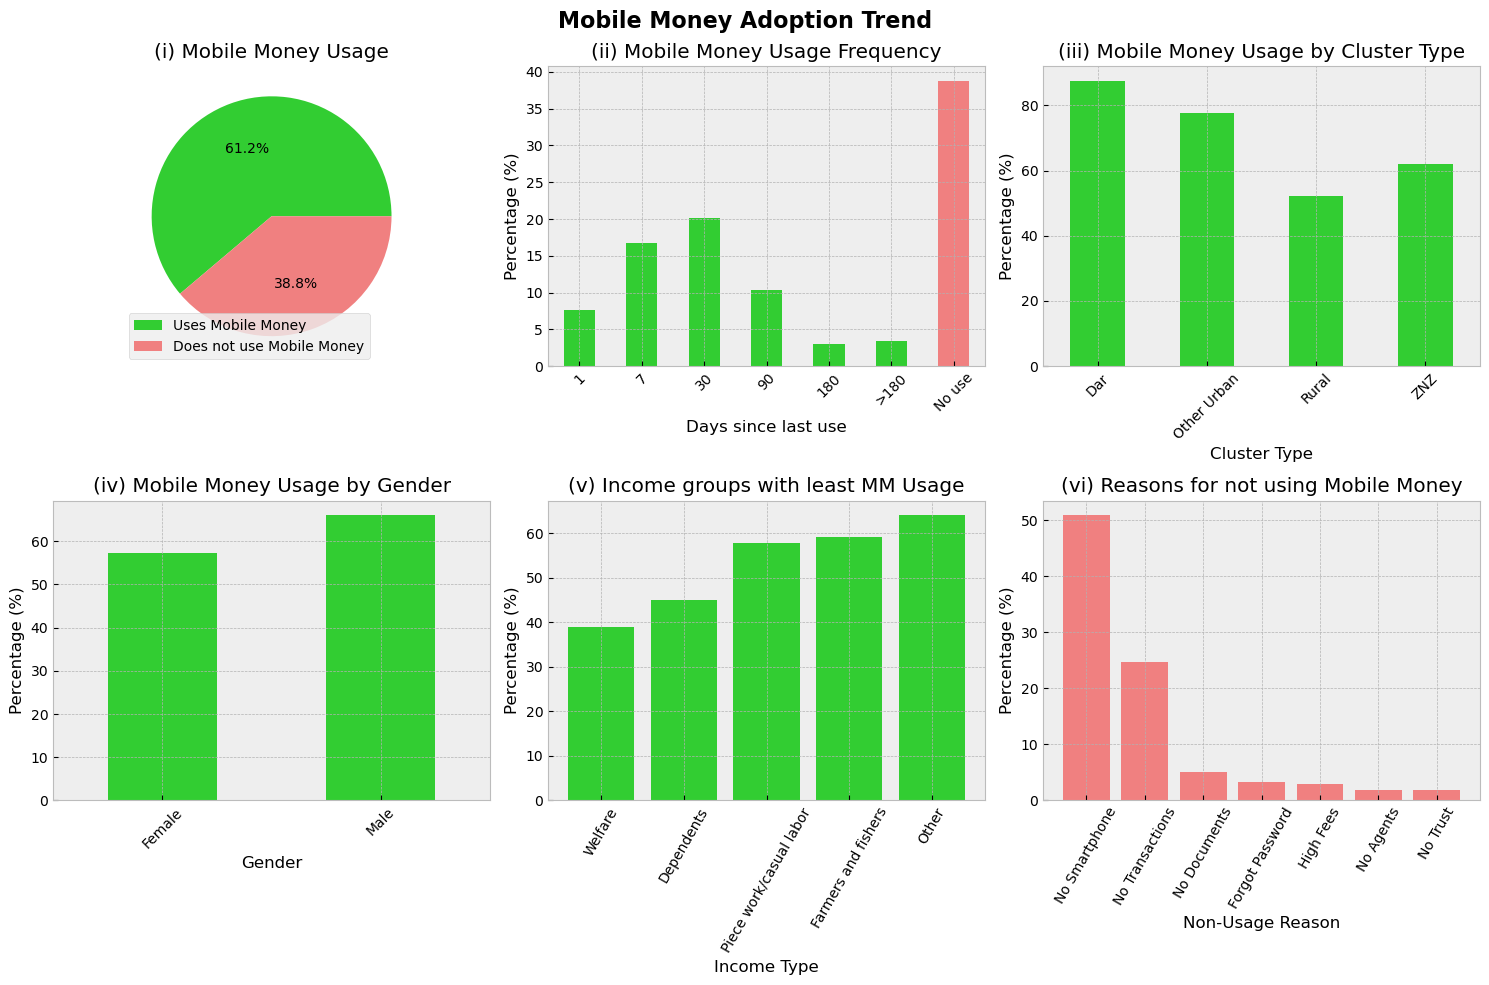

In [56]:
# Adjust the subplots to a 2x3 grid
fig, axs = plt.subplots(2, 3, figsize=(15, 10))  # Adjusted figsize for better visibility

# Pie chart
pie_chart_data.plot.pie(autopct='%1.1f%%', colors=['limegreen', 'lightcoral'], ax=axs[0, 0], labels=None)
axs[0, 0].set_title('(i) Mobile Money Usage')
axs[0, 0].set_ylabel('')
axs[0, 0].legend(pie_chart_data.index, loc="best")

# Bar chart for last mobile money usage
bar_colors = ['limegreen', 'limegreen', 'limegreen', 'limegreen', 'limegreen', 'limegreen', 'lightcoral']
last_mobile_money_usage_data.plot(kind='bar', color=bar_colors, ax=axs[0, 1])
axs[0, 1].set_title('(ii) Mobile Money Usage Frequency')
axs[0, 1].set_xlabel('Days since last use')
axs[0, 1].set_ylabel('Percentage (%)')
axs[0, 1].set_xticklabels(last_mobile_money_usage_data.index, rotation=45)

# Bar chart for mobile money usage by cluster type
cluster_type_data['Yes'].plot(kind='bar', stacked=True, color='limegreen', ax=axs[0, 2])
axs[0, 2].set_title('(iii) Mobile Money Usage by Cluster Type')
axs[0, 2].set_xlabel('Cluster Type')
axs[0, 2].set_ylabel('Percentage (%)')
# axs[0, 2].legend(title='Mobile Money Usage', loc='upper left')
axs[0, 2].set_xticklabels(cluster_type_data.index, rotation=45)

# Bar chart for mobile money usage by gender
gender_mob_usage_data['Yes'].plot(kind='bar', stacked=True, color='limegreen', ax=axs[1, 0])
axs[1, 0].set_title('(iv) Mobile Money Usage by Gender')
axs[1, 0].set_xlabel('Gender')
axs[1, 0].set_ylabel('Percentage (%)')
# axs[1, 0].legend(title='Mobile Money Usage', loc='upper left')
axs[1, 0].set_xticklabels(gender_mob_usage_data.index, rotation=45)

# Plot Bar chart for mobile money usage by income type
top_5_income_types = income_type_data.head(5)
axs[1, 1].bar(top_5_income_types.index, top_5_income_types['Yes'], color='limegreen')
axs[1, 1].set_title('(v) Income groups with least MM Usage')
axs[1, 1].set_xlabel('Income Type')
axs[1, 1].set_ylabel('Percentage (%)')
axs[1, 1].set_xticklabels(top_5_income_types.index, rotation=60)

# Plot Bar chart for reasons for not using mobile money
axs[1, 2].bar(non_usage_reasons_data.index, non_usage_reasons_data, color='lightcoral')
axs[1, 2].set_title('(vi) Reasons for not using Mobile Money')
axs[1, 2].set_xlabel('Non-Usage Reason')
axs[1, 2].set_ylabel('Percentage (%)')
axs[1, 2].set_xticklabels(non_usage_reasons_data.index, rotation=60)

# Add an overall title
fig.suptitle('Mobile Money Adoption Trend', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

In [57]:
%pip install plotly


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [58]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create a 2x3 grid of subplots
fig = make_subplots(
    rows=2, 
    cols=3, 
    subplot_titles=[
        '(i) Mobile Money Usage', 
        '(ii) Mobile Money Usage Frequency', 
        '(iii) Mobile Money Usage by Cluster Type', 
        '(iv) Mobile Money Usage by Gender', 
        '(v) Income groups with least MM Usage', 
        '(vi) Reasons for not using Mobile Money'
    ],
    specs=[
        [{'type': 'domain'}, {'type': 'xy'}, {'type': 'xy'}],
        [{'type': 'xy'}, {'type': 'xy'}, {'type': 'xy'}]
    ]
)

# Pie chart
fig.add_trace(
    go.Pie(labels=pie_chart_data.index, values=pie_chart_data.values, 
           textinfo='percent', marker=dict(colors=['limegreen', 'lightcoral'])),
    row=1, col=1
)

# Bar chart for last mobile money usage
fig.add_trace(
    go.Bar(x=last_mobile_money_usage_data.index, y=last_mobile_money_usage_data, 
           marker=dict(color=['limegreen', 'limegreen', 'limegreen', 'limegreen', 'limegreen', 'limegreen', 'lightcoral'])),
    row=1, col=2
)
fig.update_xaxes(title_text='Days Since Last Use', row=1, col=2)
fig.update_yaxes(title_text='Percentage (%)', row=1, col=2)

# Bar chart for mobile money usage by cluster type
fig.add_trace(
    go.Bar(x=cluster_type_data.index, y=cluster_type_data['Yes'], 
           marker=dict(color='limegreen')),
    row=1, col=3
)

# Bar chart for mobile money usage by gender
fig.add_trace(
    go.Bar(x=gender_mob_usage_data.index, y=gender_mob_usage_data['Yes'], 
           marker=dict(color='limegreen')),
    row=2, col=1
)

# Bar chart for mobile money usage by income type
top_5_income_types = income_type_data.head(5)
fig.add_trace(
    go.Bar(x=top_5_income_types.index, y=top_5_income_types['Yes'], 
           marker=dict(color='limegreen')),
    row=2, col=2
)

# Bar chart for reasons for not using mobile money
fig.add_trace(
    go.Bar(x=non_usage_reasons_data.index, y=non_usage_reasons_data, 
           marker=dict(color='lightcoral')),
    row=2, col=3
)

# Update layout for better visibility
fig.update_layout(
    height=800, width=1200, 
    title_text='Mobile Money Adoption Trend', 
    title_font_size=16, title_font=dict(color='black', family='Arial', size=20, weight='bold'),
    title_x=0.5,  # Center the title
    title_xanchor='center',  # Center the title
    # title_font=dict(size=20, family='Arial', color='black', bold=True),  # Bold the title
    showlegend=False
)

# Show the plot
fig.show()

**Perform Correlation Analysis between columns in data with `usesMobileMoney` column**

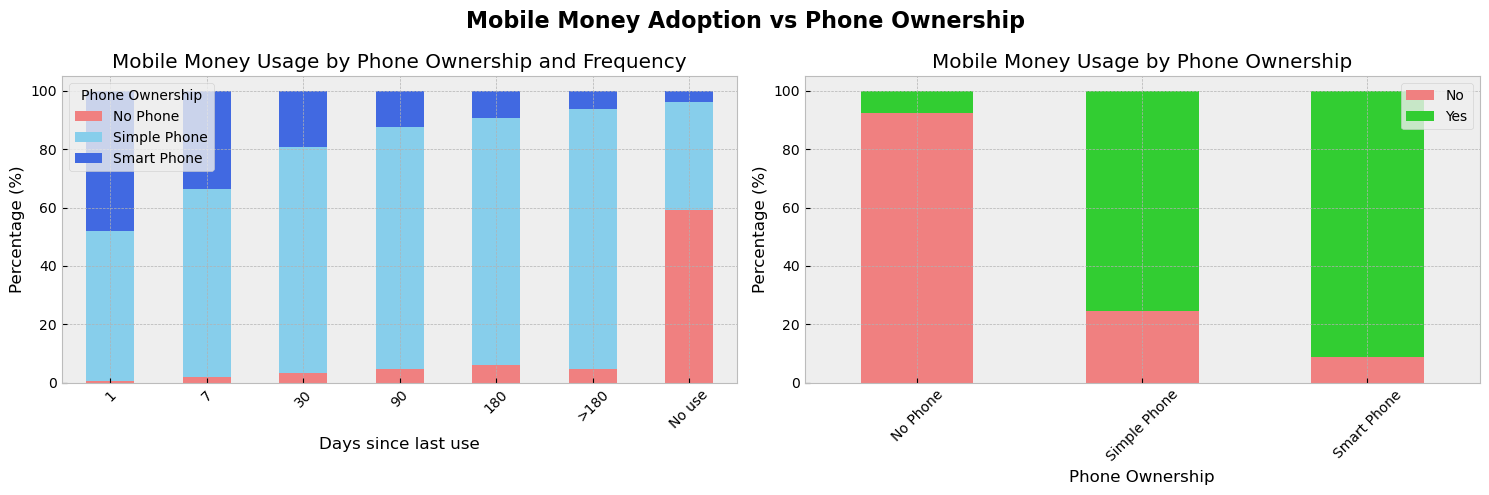

In [59]:
# Define `phoneOwnership` as an indicator variable.
#  Is `Simple Phone`, `Smart Phone` or `No Phone`, based on
#    `c25__1` = 'Yes' => 'Smart Phone' and `c25__2` = 'Yes' => 'Simple Phone', else 'No Phone'
data['phoneOwnership'] = data.apply(lambda row: 'Smart Phone' if row['c25__1'] == 'Yes' else ('Simple Phone' if row['c25__2'] == 'Yes' else 'No Phone'), axis=1)

# 1. Prepare bar chart data for phoneOwnership againt Mobile Money Usage
phone_ownership_data = data.groupby(['phoneOwnership', 'usesMobileMoney']).size().unstack(fill_value=0)

# Convert usage to percentage
phone_ownership_data = phone_ownership_data.div(phone_ownership_data.sum(axis=1), axis=0) * 100

# Replace True and False with 'Yes' and 'No'
phone_ownership_data.columns = ['No', 'Yes']

# 2. Prepare data of Trend of `lastMobileMoneyUsage` v/s `phoneOwnership`
last_mobile_money_usage_phone_ownership_data = data.groupby(['lastMobileMoneyUsage', 'phoneOwnership']).size().unstack(fill_value=0)

# Convert usage to percentage
last_mobile_money_usage_phone_ownership_data = last_mobile_money_usage_phone_ownership_data.div(last_mobile_money_usage_phone_ownership_data.sum(axis=1), axis=0) * 100

# Adjust the subplots to a 1x2 grid
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plot the data
last_mobile_money_usage_phone_ownership_data.plot(kind='bar', stacked=True, ax=axs[0], color=['lightcoral', 'skyblue', 'royalblue'])
axs[0].set_title('Mobile Money Usage by Phone Ownership and Frequency')
axs[0].set_xlabel('Days since last use')
axs[0].set_ylabel('Percentage (%)')
axs[0].legend(title='Phone Ownership', loc='upper left')
axs[0].set_xticklabels(last_mobile_money_usage_data.index, rotation=45)

# Plot the data
phone_ownership_data.plot(kind='bar', stacked=True, color=['lightcoral', 'limegreen'], ax=axs[1])
axs[1].set_title('Mobile Money Usage by Phone Ownership')
axs[1].set_xlabel('Phone Ownership')
axs[1].set_ylabel('Percentage (%)')
axs[1].set_xticklabels(phone_ownership_data.index, rotation=45)

# Add an overall title
fig.suptitle('Mobile Money Adoption vs Phone Ownership', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

In [60]:
# Prepare a correlation matrix between `usesMobileMoney` and other fields in the data

# Select numeric columns only
numeric_df = data.select_dtypes(include=['number', 'boolean'])
# Calculate correlation matrix
corr_matrix = numeric_df.corr()['lastMobileMoneyUsage']
# Order correlation matrix from high to low
corr_matrix = corr_matrix.abs().sort_values(ascending=False)

# Print correlation matrix
print('\nTop positive correlations:')
print(corr_matrix[:8])


Top positive correlations:
lastMobileMoneyUsage       1.000000
usesMobileMoney            0.894471
highestLevelOfEducation    0.346224
e_5_1                      0.321496
e_5_2                      0.254996
SN                         0.213524
Household_weight           0.070283
ea_code                    0.057257
Name: lastMobileMoneyUsage, dtype: float64


### Identified columns with high correlation with using Mobile Money

<table>
  <tr>
    <th>Field</th>
    <th>Description</th>
    <th>Category</th>
  </tr>
  <tr>
    <td>e_5_1</td>
    <td>You feel comfortable to go into a bank or another financial institution</td>
    <td><b>Socio-Economic (Psychological) Factor</b></td>
  </tr>
  <tr>
    <td>e_5_2</td>
    <td>You have received some financial education in your life</td>
    <td><b>Financial Education Factor</b></td>
  </tr>
</table>

## 1. Socio-Economic Factors

<ol>
  <li><b>e_5_1</b>: You feel comfortable to go into a bank or another financial institution</li>

  <li>
    <b>Trust Issues</b>:
    <ol>
      <li>mob1_3: 1.3.Paying for goods and services using your phone is safer than carrying cash</li>
      <li>mob1_4: 1.4.One can easily lose money if you send/receive it using a mobile phone</li>
      <li>mob1_7: 1.7.You are among the victims of cybercrime</li>
      <li>mob1_8: 1.8.You know someone who has lost money through a mobile money scam
      <li>mob1_9: 1.9.Don't trust saving money on mobile money account because of mobile money scam</li>
      <li>mob1_10: 1.10.You have ever received a call/sms intending to steal from your mobile wallet<li>
    </ol>
  </li>
  <li><b>People living with Disabilities</b></li>
  <li>Type of employment:
    <ol>
      <li>Farmers</li>
      <li>Small scale traders (Machinga) - hasMachingaId </li>
      <li>Casual Labourers</li>
      <li>Salaried employees</li>
      <li>Pensioners</li>
      <li>Welfare</li>
    </ol>
  </li>
  <li>Access to Mobile Phone</li>
  <li>Access to internet</li>
  <li>Possess National ID<li>
  <li>Network Coverage</li>
  <li>Has Smartphone/Simple phone - hasSmartPhone or hasSimplePhone</li>
  <li>
    Psychological factors:
    <li>pay_1: You do not like carrying cash</li>
    <li>pay_1_4: You prefer to pay for goods and services in cash rather than using electronic or mobile phone </li>
    <li>pay_1_6: 1.6.When you need to get cash or deposit cash, which of the following services do you use most frequently? </li>
  </li>
    pb2_5: 2.5.In the past 12 months, how often did you use the Mobile money for purchases of goods <br/>
    pb3_1: 3.1.In the past 12 months, how often did you use the QR code  for purchases of goods <br/>
    pb3_3: 3.3.In the past 12 months, how often did you use the Lipa Namba for purchases of goods 
  </li>
  <li>Welfare beneficiary: <br/>
    gov_1__1: 1. Basic TASAF cash transfer <br/>
    gov_1__2: 1. Additional Conditional TASAF cash transfer <br/>
    gov_1__3: 1. Pension for elders (Znz only) <br/>
    gov_1__4: 1. Others
  </li>
  <li>pens1: 1.Do you have, or are you a member of a pension fund?</li>
  <li>ins2: 2.Do you have insurance cover?</li>
  <li>mob5e: 5.a.5.Your mobile money fees and charges are reasonable</li>
  <li>k_1_1: Literacy in Kiswahili</li>
  <li>k_1_2: K.1.2. English Literacy Assessment</li>
</ol>

mob2: 2.Are you currently using mobile money? /  
mob3: 3.What is the main reason why do you not use mobile money?
mob4: 4.When did you first start using mobile money services?
mob10_1_1,7 - trust issues

RU: Rural, Urban, Dar-es-Salaam and Zanzibar
MZ: Mainland and Zanzibar

Also indicator columns at end

MM, BANKED, PENSION, MFI, INSURANCE, SACCO, DEDICATED_FARMER, SMALLHOLDER_FARMER


### **1.1 e_5_1: Do you feel comfortable to go into a bank or another financial institution**

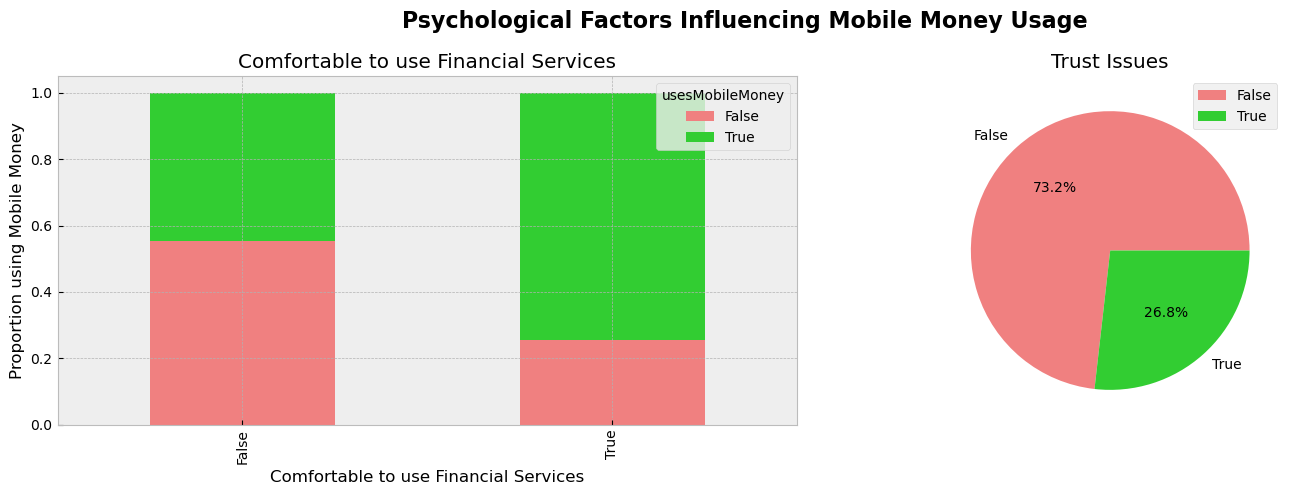

In [61]:
# Prepare data on psychological factors that influence mobile money usage

# 1. Comfortable to use Financial Services
data['comfortableToUseFinancialServices'] = data['e_5_1']
comfortable_using_fi_services_data = pd.crosstab(data['comfortableToUseFinancialServices'], data['usesMobileMoney'], normalize='index')

# 2. Trust Issues
data['trustIssues'] = data[['mob1_7', 'mob1_9']].apply(lambda row: row.str.strip() == 'Agree').any(axis=1)
trust_issues_data = data['trustIssues'].value_counts();

# Adjust the subplots to a 1x2 grid
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plot the data
comfortable_using_fi_services_data.plot(kind='bar', stacked=True, color=['lightcoral', 'limegreen'], ax=axs[0])
axs[0].set_title('Comfortable to use Financial Services')
axs[0].set_xlabel('Comfortable to use Financial Services')
axs[0].set_ylabel('Proportion using Mobile Money')
axs[0].legend(title='usesMobileMoney', loc='upper right')


trust_issues_data.plot.pie(autopct='%1.1f%%', ax=axs[1], colors=['lightcoral', 'limegreen'])
axs[1].set_ylabel('')
axs[1].set_title('Trust Issues')
axs[1].legend(trust_issues_data.index, loc="best")

# Add an overall title
fig.suptitle('Psychological Factors Influencing Mobile Money Usage', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

**From above plot we can determine that a large proportion of respondents who reported to not being comfortable with using Bank or other Financial services also reported to not using Mobile Money.**

**1.2. Trust Issues (combination of mob1_7, mob1_9)**

trustIssues
False    0.593001
True     0.663154
Name: usesMobileMoney, dtype: float64


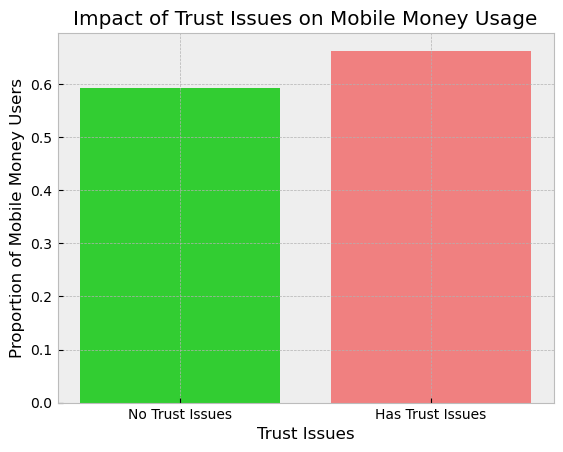

In [62]:
# prompt: create an analysis between trustIssues and usesMobileMoney

# Group the data by 'trustIssues' and calculate the mean of 'usesMobileMoney' for each group
trust_impact = data.groupby('trustIssues')['usesMobileMoney'].mean()

# Print the results
print(trust_impact)

# Create a bar plot to visualize the impact of trust issues on mobile money usage
plt.bar(trust_impact.index.astype(str), trust_impact.values, color=['limegreen', 'lightcoral'])
plt.xlabel('Trust Issues')
plt.ylabel('Proportion of Mobile Money Users')
plt.title('Impact of Trust Issues on Mobile Money Usage')
plt.xticks([0, 1], ['No Trust Issues', 'Has Trust Issues'])
plt.show()

## **1.3 General Factors**

**1.3.1 mob9_3: What is the main reason for not using mobile money more often?**

In [63]:
data['mob9_3'].value_counts().sort_values(ascending=False)

mob9_3
                              9286
Only use for emergencies       423
Too expensive                   76
Didn’t need it                  50
Other                           45
Am not the decision maker       18
Doesn’t suit/meet my needs      13
Service is not good              4
Name: count, dtype: int64

## **2. Educational Factors influencing Mobile Money usage**

<ol>
  <li>c11: Highest level of education completed
  <li>e_5_2: You have received some financial education in your life</li>
  <li>
</ol>

**2.1 c11: highest level of education completed**

In [64]:
# Get distinct values of `c11` (Highest level of education completed) and their counts
data['c11'].value_counts()

c11
Primary completed                            4348
No formal education                          1592
Some primary                                 1354
Secondary competed-O level                   1275
Some secondary                                830
University or higher education completed      292
Some University or other higher education     125
Post primary technical training                55
Secondary completed-A level                    40
Don’t know                                      4
Name: count, dtype: int64

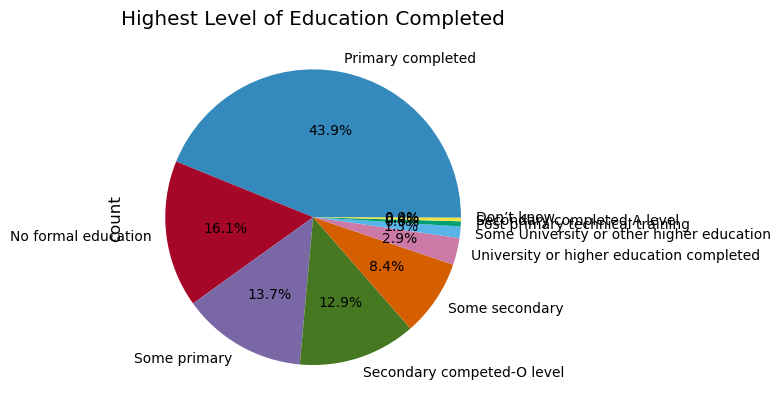

In [65]:
# Draw pie chart of `c11`

data['c11'].value_counts().plot.pie(autopct='%1.1f%%')

plt.title('Highest Level of Education Completed')
plt.show()

**Draw a bar chart of Highest Level of Education Received (`c11`) vs `usesMobileMoney` percentage count for each group**

In [66]:
# Group data by `c11` and `usesMobileMoney` and calculate percentage count for each group
grouped = data.groupby(['c11', 'usesMobileMoney']).size().unstack().reset_index()

grouped['total'] = grouped[False] + grouped[True]
grouped[False] = (grouped[False] / grouped['total']) * 100
grouped[True] = (grouped[True] / grouped['total']) * 100

grouped.head(20)

usesMobileMoney,c11,False,True,total
0,Don’t know,75.000000,25.000000,4
1,No formal education,65.954774,34.045226,1592
2,Post primary technical training,14.545455,85.454545,55
3,Primary completed,33.808648,66.191352,4348
4,Secondary competed-O level,18.745098,81.254902,1275
5,Secondary completed-A level,7.500000,92.500000,40
6,Some University or other higher education,4.800000,95.200000,125
7,Some primary,52.437223,47.562777,1354
8,Some secondary,41.325301,58.674699,830
9,University or higher education completed,5.821918,94.178082,292


**Re-arrange grouped data according to c11 such that**

1 - "Don’t know"

2 -	"No formal education"

4 -	"Post primary technical training"

3 -	"Primary completed"

5 - "Secondary competed-O level"

In [67]:
grouped = grouped.reindex([0, 1, 7, 3, 8, 2, 4, 5, 6, 9])

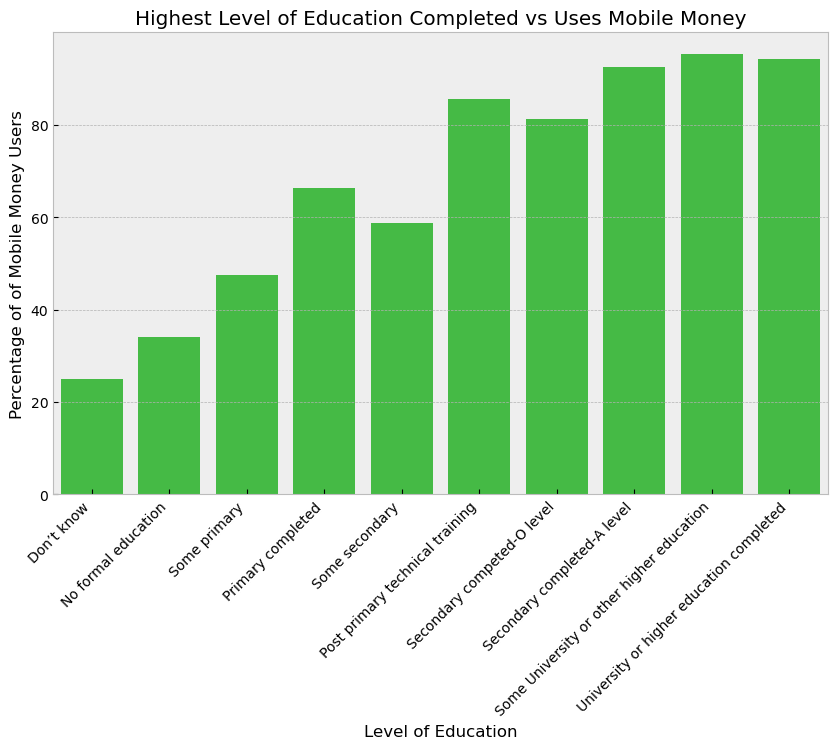

In [68]:
# Plot bar chart of c11 vs True
plt.figure(figsize=(10, 6))
sns.barplot(x='c11', y=True, data=grouped, color='limegreen')
# Label x-axis and y-axis
plt.xlabel('Level of Education')
plt.ylabel('Percentage of of Mobile Money Users')

plt.title('Highest Level of Education Completed vs Uses Mobile Money')

# show x-axis labels  vertically slanted aligned
plt.xticks(rotation=45, ha='right')

plt.show()

**From above plot we can deduce that respondents who reported lower level or education completed also had lower levels of Mobile Money adoption**

**2.2 e_5_2: You have received some financial education in your life**

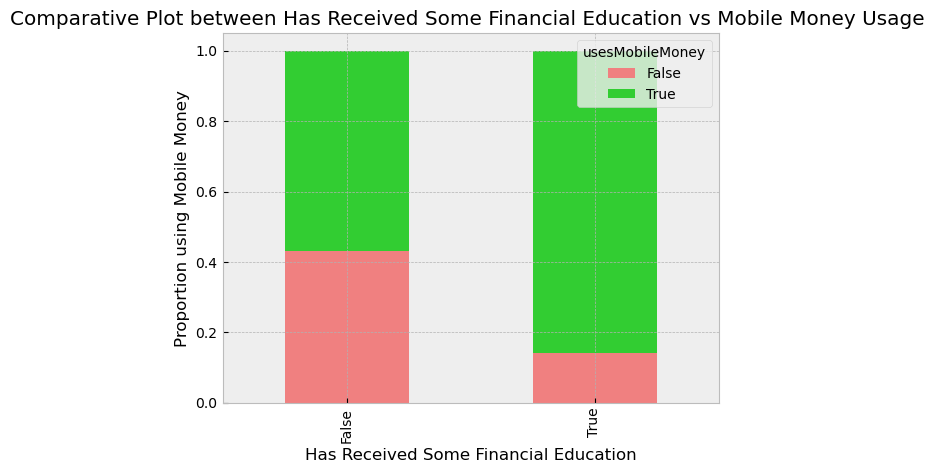

In [69]:
# Plot a comparative pie-chart for e_5_2
data['hasReceivedSomeFinancialEducation'] = data['e_5_2']

# Create a crosstab for comparative analysis
comfortable_using_fi_services_data = pd.crosstab(data['hasReceivedSomeFinancialEducation'], data['usesMobileMoney'], normalize='index')

# Plotting
comfortable_using_fi_services_data.plot(kind='bar', stacked=True, color=['lightcoral', 'limegreen'])

# Adding labels and title
plt.xlabel('Has Received Some Financial Education')
plt.ylabel('Proportion using Mobile Money')
plt.title('Comparative Plot between Has Received Some Financial Education vs Mobile Money Usage ')
plt.legend(title='usesMobileMoney', loc='upper right')

# Display the plot
plt.show()

**From above plot we can determine that a large proportion of respondents who reported to not receiving any financial education also reported to not using Mobile Money.**

# 2.0 Model Development

In [70]:
# Perform feature Engineering

# Define the mapping from current values to True, False, and np.nan (for NULL)
agree_scale_conversion_dict = {
    'Agree': True,
    'Yes': True,
    'Disagree': False,
    'No': False,
    ' ': False,  # ' ' should be converted to False
    'Dont know': False  # 'Dont know' should also be converted to False
}

# Apply the mapping to the 'mob5a' column
data.loc[:, 'hasAccessToMobilePhone'] = data['c23__1'].map(agree_scale_conversion_dict)
data.loc[:, 'hasAccessToInternet'] = data['c23__2'].map(agree_scale_conversion_dict)
data.loc[:, 'ownsASimCard'] = data['c24_2'].map(agree_scale_conversion_dict)

# c24_1 conversion dictionary
c24_1_conversion_dict = {
    'Yes': True,
    '2': False,
}
data.loc[:, 'ownsAMobilePhone'] = data['c24_1'].map(c24_1_conversion_dict)

# c24_3 conversion dictionary
c24_3_conversion_dict = {
    'There is no connection': 0,
    'It is bad – calls rarely connect, calls often drop, it is hard to hear what people say': 1,
    'It is good – calls sometimes drop, sound is often poor, although you can still understand what people say': 2,
    'It is excellent – calls mostly connect, sound is excellent': 3,
}
data.loc[:, 'phoneNetworkQualityAtHome'] = data['C24_3'].map(c24_3_conversion_dict)

# Define the ordinal mapping based on the defined order
edu_level_ordinal_mapping = {
    'Don’t know': 0, # Treat 'Don’t know' as NaN
    'No formal education': 1,
    'Some primary': 2,
    'Primary completed': 3,
    'Post primary technical training': 4,
    'Some secondary': 5,
    'Secondary competed-O level': 6,
    'Secondary completed-A level': 7,
    'Some University or other higher education': 8,
    'University or higher education completed': 9,
}

# Apply the mapping to the 'c11' column
data.loc[:, 'highestLevelOfEducation'] = data['c11'].map(edu_level_ordinal_mapping)

loc_type_ordinal_mapping = {
    'Rural': 0,
    'Urban': 1,
}
data.loc[:, 'ruralUrban'] = data['clustertype'].map(loc_type_ordinal_mapping)

gender_mapping = {
    'Male': 0,
    'Female': 1,
}
data.loc[:, 'gender'] = data['c9'].map(gender_mapping)

phone_type_mapping = {
    'No Phone': 0,
    'Simple Phone': 1,
    'Smart Phone': 2,
}
data.loc[:, 'phoneType'] = data['phoneOwnership'].map(phone_type_mapping)

# Is Farmers
data.loc[:, 'isFarmer'] = data['IncomeMain'].apply(lambda x: x == 'Farmers and fishers')
data.loc[:, 'isCasualLabourer'] = data['IncomeMain'].apply(lambda x: x == 'Piece work/casual labor')
data.loc[:, 'isOnWelfare'] = data['IncomeMain'].apply(lambda x: x == 'Welfare')
data.loc[:, 'isADependant'] = data['IncomeMain'].apply(lambda x: x == 'Dependents')

data.loc[:, 'hasNationalId'] = data['c27__1'].apply(lambda x: x == 'Yes') | (data['c27__2'] == 'Yes')
data.loc[:, 'age'] = data['c8c']

data.head()

,SN,reg_name,reg_code,dist_code,dist_name,ward_code1,ward_name,ea_code,clustertype,c1,...,phoneNetworkQualityAtHome,ruralUrban,gender,phoneType,isFarmer,isCasualLabourer,isOnWelfare,isADependant,hasNationalId,age
0,4529,Mwanza,19,7,Misungwi,251,Mondo,4,Rural,Original,...,1,0,1,1,True,False,False,False,True,47
1,4245,Kagera,18,7,Missenyi,11,Kakunyu,1,Rural,Original,...,3,0,1,0,True,False,False,False,False,63
2,8149,Mbeya,12,3,Kyela,283,Nkuyu,301,Urban,Original,...,2,1,0,1,False,True,False,False,True,74
3,6763,Dodoma,1,3,Kongwa,123,Kibaigwa,301,Urban,Original,...,3,1,1,1,False,False,False,False,False,29
4,7805,Dar es Salaam,7,2,Ilala,252,Majohe,29,Urban,Original,...,2,1,0,1,True,False,False,False,True,53


In [71]:
# prompt:  Develop a model predicting `usesMobileMoney` based on other fields in the data
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Select relevant features (you might need to adjust this based on your analysis)
features = [
    'usesMobileMoney', # Predicted Variable (y1)
    'lastMobileMoneyUsage', # Predicted Variable (y2)
    'comfortableToUseFinancialServices', # You feel comfortable to go into a bank or other financial inst.
    'hasReceivedSomeFinancialEducation', # You have received financial education in your life
    'highestLevelOfEducation',   # Highest Level of Education completed
    'hasAccessToMobilePhone', # Access to mobile phone
    'hasAccessToInternet', # Access to the internet
    'ownsAMobilePhone', # Do you personally own a mobile phone?
    'ownsASimCard', # Do you own a SIM card that you can use at any time?
    'phoneNetworkQualityAtHome', # How good is the mobile phone access in the area you are living
    'ruralUrban', # Defines the location area
    'trustIssues', # Has reported trust issues
    'phoneType', # Has feature phone/smartphone
    'age', # Age
    'gender', # Gender
    'isFarmer', # Income type
    'isCasualLabourer', # Income type
    'isADependant', # Income type
    'hasNationalId', # Possess national id
]
model_data = data[features]
model_data.head()

,usesMobileMoney,lastMobileMoneyUsage,comfortableToUseFinancialServices,hasReceivedSomeFinancialEducation,highestLevelOfEducation,hasAccessToMobilePhone,hasAccessToInternet,ownsAMobilePhone,ownsASimCard,phoneNetworkQualityAtHome,ruralUrban,trustIssues,phoneType,age,gender,isFarmer,isCasualLabourer,isADependant,hasNationalId
0,True,4,False,False,2,True,True,True,True,1,0,True,1,47,1,True,False,False,True
1,False,7,False,False,1,False,False,False,False,3,0,True,0,63,1,True,False,False,False
2,True,4,True,True,2,True,False,True,True,2,1,False,1,74,0,False,True,False,True
3,True,3,True,False,2,True,False,True,True,3,1,False,1,29,1,False,False,False,False
4,True,3,True,False,3,True,False,True,True,2,1,True,1,53,0,True,False,False,True


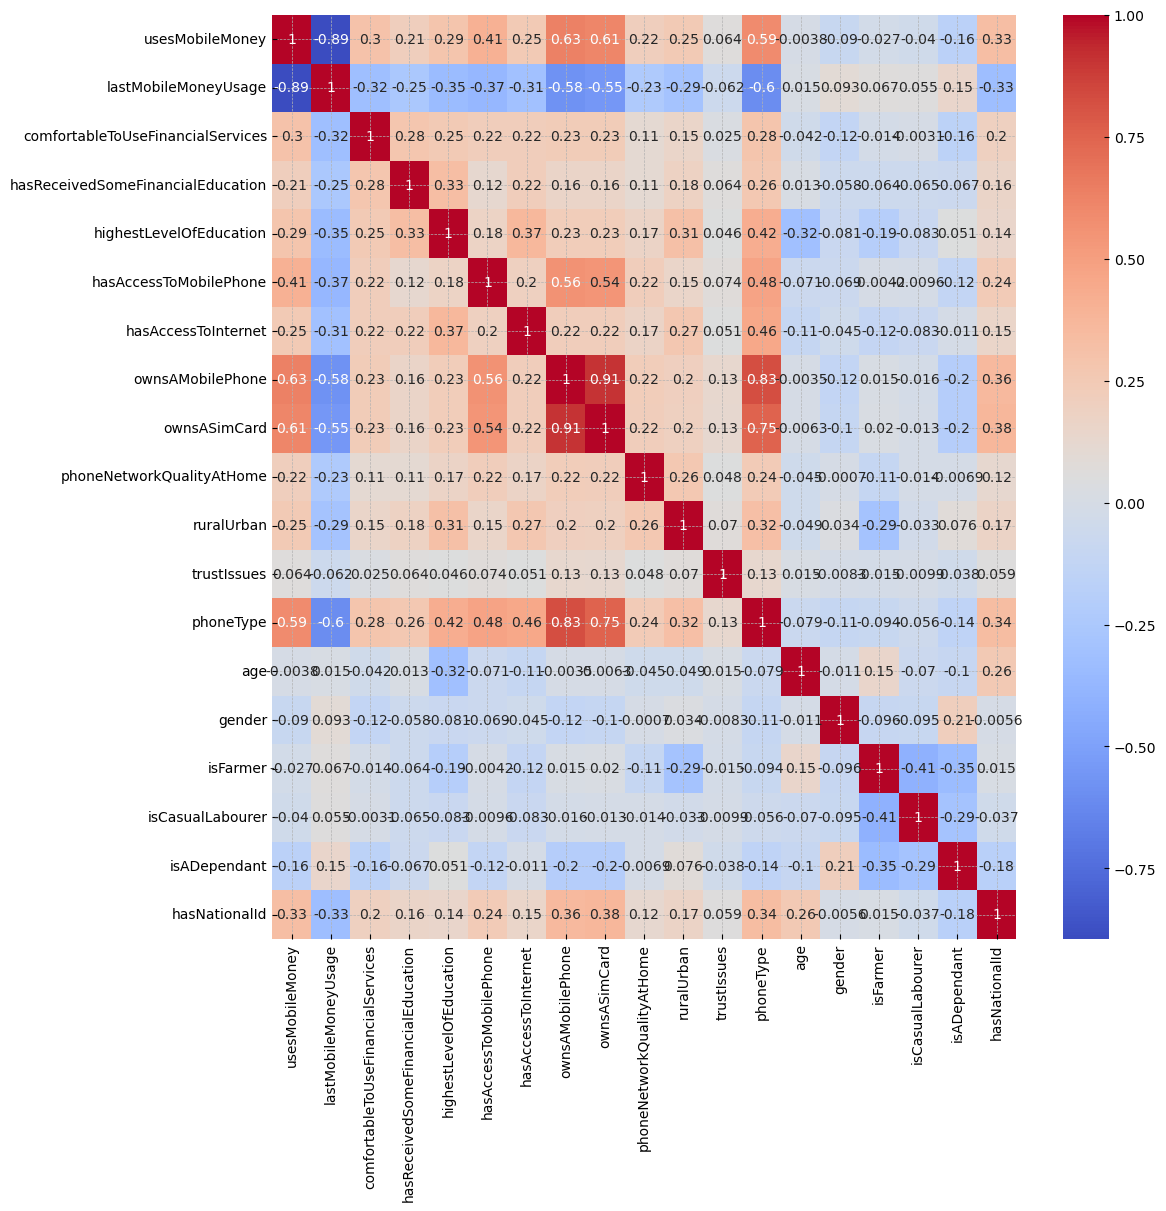

In [72]:
#show visualization
plt.figure(figsize=(12, 12))
sns.heatmap(model_data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [73]:
model_data.count()

usesMobileMoney                      9915
lastMobileMoneyUsage                 9915
comfortableToUseFinancialServices    9915
hasReceivedSomeFinancialEducation    9915
highestLevelOfEducation              9915
hasAccessToMobilePhone               9915
hasAccessToInternet                  9915
ownsAMobilePhone                     9915
ownsASimCard                         9915
phoneNetworkQualityAtHome            9915
ruralUrban                           9915
trustIssues                          9915
phoneType                            9915
age                                  9915
gender                               9915
isFarmer                             9915
isCasualLabourer                     9915
isADependant                         9915
hasNationalId                        9915
dtype: int64

In [74]:
!pip install imbalanced-learn


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


In [80]:
# Splitting the data into features and target
from sklearn.compose import ColumnTransformer
from sklearn.discriminant_analysis import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE

import joblib

X = model_data.drop(['usesMobileMoney', 'lastMobileMoneyUsage'], axis=1)
y = model_data['usesMobileMoney']  # Choose the appropriate target variable

categorical_cols = ['phoneNetworkQualityAtHome', 'ruralUrban', 'gender']

# Creating transformers for numerical and categorical data
age_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
], memory=None)

edu_level_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
], memory=None)

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
], memory=None)

# Combining transformers into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('age', age_transformer, ['age']),
        ('edu', edu_level_transformer, ['highestLevelOfEducation']),
        ('cat', categorical_transformer, categorical_cols)
    ])


# Fit the preprocessor and transform the training data
preprocessor.fit(X)
X_transformed = preprocessor.transform(X)

# Save the preprocessor to disk
joblib.dump(preprocessor, './models/preprocessor.joblib')

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_transformed, y, test_size=0.2, random_state=42
)

In [76]:
# prompt: Develop different model predicting `usesMobileMoney` based on other fields in the data

import joblib
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Set hyperparameters
learning_rate = 0.1

# Define a list of models to evaluate
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('Support Vector Machine', SVC()),
    ('Naive Bayes', GaussianNB()),
    # ('Neural Network', MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, learning_rate_init=learning_rate))
]

best_model = None

# mkdir './models' if not exist
!mkdir -p './models'

# Iterate through the models and evaluate their performance
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    if best_model is None or accuracy > best_model['accuracy']:
        best_model = {
            'name': name,
            'model': model,
            'accuracy': accuracy,
            'report': report,
            'conf_matrix': conf_matrix
        }

    print(f"Model: {name}")
    print(f"Accuracy: {accuracy}")
    print("Classification Report:\n", report)
    print("-" * 30)

    # Save model to file in './models' directory
    filename = f'./models/{name}.pkl'
    joblib.dump(model, filename)

print(f"Best Model: {best_model['name']}")

Model: Logistic Regression
Accuracy: 0.6797781139687342
Classification Report:
               precision    recall  f1-score   support

       False       0.61      0.49      0.54       764
        True       0.71      0.80      0.75      1219

    accuracy                           0.68      1983
   macro avg       0.66      0.64      0.65      1983
weighted avg       0.67      0.68      0.67      1983

------------------------------
Model: Decision Tree
Accuracy: 0.6505295007564297
Classification Report:
               precision    recall  f1-score   support

       False       0.55      0.56      0.55       764
        True       0.72      0.71      0.71      1219

    accuracy                           0.65      1983
   macro avg       0.63      0.63      0.63      1983
weighted avg       0.65      0.65      0.65      1983

------------------------------
Model: Random Forest
Accuracy: 0.6671709531013615
Classification Report:
               precision    recall  f1-score   support

 

# 2.1 Perform What-If Analysis

In [77]:
# Copy data for what-if analysis
model = best_model['model']

what_if_data = X.copy()

percentage_increase = 0.6
field_name = 'comfortableToUseFinancialServices'

def increase_field_value(what_if_data, field_name, percentage_increase):
    field_counts = what_if_data[field_name].value_counts()

    # Increase the value of True responses in the field by percentage_increase
    total_count = field_counts.sum()
    count_to_increase = int(field_counts[True] * percentage_increase)

    generator = np.random.default_rng(42)

    # Iterate through the data and increase the value of the field, but randomly select the rows where the field is False
    while (count_to_increase > 0 and what_if_data[field_name].value_counts()[True] < total_count):
        for index, row in what_if_data.iterrows():
            if count_to_increase == 0:
                break

            if not row[field_name]:
                # generate random number between 0 and 1, and if it is less than the percentage increase, set the field to True
                if generator.random() < percentage_increase:
                    what_if_data.at[index, field_name] = True
                    count_to_increase -= 1
                else:
                    continue
    
    return what_if_data

def get_percentage_yes(what_if_data, field_name):
    counts = what_if_data[field_name].value_counts()
    return (counts[True] / counts.sum()) * 100


# before
print(get_percentage_yes(what_if_data, field_name))

increase_field_value(what_if_data, field_name, percentage_increase)

# after
print(get_percentage_yes(what_if_data, field_name))


55.49167927382753
88.78466969238528


Original Mobile Money Adoption Rate: 61.18
Modified Mobile Money Adoption Rate (with prediction model): 69.95461
Modified Mobile Money Adoption Rate (with 20% increase in financial education): 69.95461
Modified Mobile Money Adoption Rate (with 40% increase in financial education): 69.95461
Modified Mobile Money Adoption Rate (with 60% increase in financial education): 69.95461


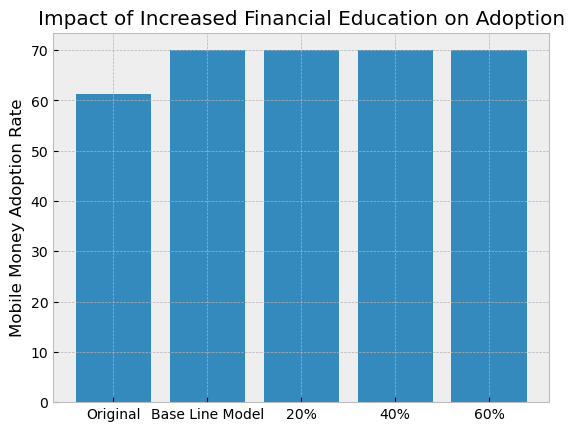

In [78]:

# --- What-If Analysis ---

# Example: Analyze the impact of 20%, 50% increase in financial education ('e_5_2')

# Create copies of the test data and modify the 'e_5_2' column

field_name = 'hasAccessToMobilePhone'


'''
'comfortableToUseFinancialServices', # You feel comfortable to go into a bank or other financial inst.
    'hasReceivedSomeFinancialEducation', # You have received financial education in your life
    'highestLevelOfEducation',   # Highest Level of Education completed
    'hasAccessToMobilePhone', # Access to mobile phone
    'hasAccessToInternet', # Access to the internet
    'ownsAMobilePhone', # Do you personally own a mobile phone?
    'ownsASimCard', # Do you own a SIM card that you can use at any time?
    'phoneNetworkQualityAtHome', # How good is the mobile phone access in the area you are living
    'ruralUrban', # Defines the location area
    'trustIssues', # Has reported trust issues
    'phoneType', # Has feature phone/smartphone
    'age', # Age
    'gender', # Gender
    'isFarmer', # Income type
    'isCasualLabourer', # Income type
    'isADependant', # Income type
    'hasNationalId', # Possess national id
'''

X_test_modified_20 = X.copy(deep=True)
X_test_modified_40 = X.copy(deep=True)
X_test_modified_60 = X.copy(deep=True)

X_test_modified_20 = increase_field_value(X_test_modified_20, field_name, 0.20)
X_test_modified_40 = increase_field_value(X_test_modified_40, field_name, 0.40)
X_test_modified_60 = increase_field_value(X_test_modified_60, field_name, 0.60)


# Impute missing values in the modified data
X_original = preprocessor.transform(X)
X_test_modified_imputed_20 = preprocessor.transform(X_test_modified_20)
X_test_modified_imputed_40 = preprocessor.transform(X_test_modified_40)
X_test_modified_imputed_60 = preprocessor.transform(X_test_modified_60)

# Predict using the modified data
y_pred_original = model.predict(X_original)
y_pred_modified_20 = model.predict(X_test_modified_imputed_20)
y_pred_modified_40 = model.predict(X_test_modified_imputed_40)
y_pred_modified_60 = model.predict(X_test_modified_imputed_60)

# Compare the original and modified predictions
# original_adoption_rate = y.mean()
# modified_adoption_rate_20 = y_pred_modified_20.mean()
# modified_adoption_rate_40 = y_pred_modified_40.mean()
# modified_adoption_rate_60 = y_pred_modified_60.mean()

# modify above calculation of adoption rate to use percentage of True values instead of mean
total_count = len(y)
original_adoption_rate = y.sum() / total_count * 100
original_pred_adoption_rate = y_pred_original.sum() / total_count * 100
modified_adoption_rate_20 = y_pred_modified_20.sum() / total_count * 100
modified_adoption_rate_40 = y_pred_modified_40.sum() / total_count * 100
modified_adoption_rate_60 = y_pred_modified_60.sum() / total_count * 100

print(f"Original Mobile Money Adoption Rate: {original_adoption_rate:.2f}")
print(f"Modified Mobile Money Adoption Rate (with prediction model): {original_pred_adoption_rate:.5f}")
print(f"Modified Mobile Money Adoption Rate (with 20% increase in financial education): {modified_adoption_rate_20:.5f}")
print(f"Modified Mobile Money Adoption Rate (with 40% increase in financial education): {modified_adoption_rate_40:.5f}")
print(f"Modified Mobile Money Adoption Rate (with 60% increase in financial education): {modified_adoption_rate_60:.5f}")

# Visualize the impact
plt.bar(['Original', 'Base Line Model', '20%', '40%', '60%'],
        [original_adoption_rate, original_pred_adoption_rate, modified_adoption_rate_20, modified_adoption_rate_40, modified_adoption_rate_60])
plt.ylabel('Mobile Money Adoption Rate')
plt.title('Impact of Increased Financial Education on Adoption')
plt.show()


In [79]:

# --- What-If Analysis ---

# Example: Analyze the impact of 20%, 40% increase in financial institutions ('e_5_1')

# Create copies of the test data and modify the 'e_5_1' column
X_test_modified_20 = X_test.copy()
X_test_modified_40 = X_test.copy()

# Simulate a 20% increase in comfort with financial institutions
num_true_to_add_20 = int(len(X_test_modified_20) * 0.20)
indices_to_change_20 = X_test_modified_20[X_test_modified_20['e_5_1'] == False].sample(n=num_true_to_add_20, random_state=42).index
X_test_modified_20.loc[indices_to_change_20, 'e_5_1'] = True

# Simulate a 40% increase in comfort with financial institutions
num_true_to_add_40 = int(len(X_test_modified_40) * 0.40)
indices_to_change_40 = X_test_modified_40[X_test_modified_40['e_5_1'] == False].sample(n=num_true_to_add_40, random_state=42).index
X_test_modified_40.loc[indices_to_change_40, 'e_5_1'] = True

# Impute missing values in the modified data
X_test_modified_imputed_20 = imputer.transform(X_test_modified_20)
X_test_modified_imputed_40 = imputer.transform(X_test_modified_40)

# Predict using the modified data
y_pred_modified_20 = model.predict(X_test_modified_20)
y_pred_modified_40 = model.predict(X_test_modified_40)

# Compare the original and modified predictions
original_adoption_rate = y_test.mean()
modified_adoption_rate_20 = y_pred_modified_20.mean()
modified_adoption_rate_40 = y_pred_modified_40.mean()

print(f"Original Mobile Money Adoption Rate: {original_adoption_rate:.2f}")
print(f"Modified Mobile Money Adoption Rate (with 20% increase in comfort with financial institutions): {modified_adoption_rate_20:.5f}")
print(f"Modified Mobile Money Adoption Rate (with 40% increase in comfort with financial institutions): {modified_adoption_rate_40:.5f}")

# Visualize the impact
plt.bar(['Original', '20% Increase', '40% Increase'],
        [original_adoption_rate, modified_adoption_rate_20, modified_adoption_rate_40])
plt.ylabel('Mobile Money Adoption Rate')
plt.title('Impact of Increased Comfort with Financial Institutions on Adoption')
plt.show()


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
# --- What-If Analysis ---

# Example: Analyze the impact of 20%, 40%, 60% increase in education level ('c11_encoded')

# Create copies of the test data and modify the 'c11_encoded' column
X_test_modified_20 = X_test.copy()
X_test_modified_40 = X_test.copy()
X_test_modified_60 = X_test.copy()

# Simulate a 20% increase in education level
num_to_increase_20 = int(len(X_test_modified_20) * 0.20)
indices_to_change_20 = X_test_modified_20.sample(n=num_to_increase_20, random_state=42).index
X_test_modified_20.loc[indices_to_change_20, 'c11_encoded'] = X_test_modified_20.loc[indices_to_change_20, 'c11_encoded'] + 1

# Simulate a 40% increase in education level
num_to_increase_40 = int(len(X_test_modified_40) * 0.40)
indices_to_change_40 = X_test_modified_40.sample(n=num_to_increase_40, random_state=42).index
X_test_modified_40.loc[indices_to_change_40, 'c11_encoded'] = X_test_modified_40.loc[indices_to_change_40, 'c11_encoded'] + 1

# Simulate a 60% increase in education level
num_to_increase_60 = int(len(X_test_modified_60) * 0.60)
indices_to_change_60 = X_test_modified_60.sample(n=num_to_increase_60, random_state=42).index
X_test_modified_60.loc[indices_to_change_60, 'c11_encoded'] = X_test_modified_60.loc[indices_to_change_60, 'c11_encoded'] + 1

# Impute missing values in the modified data
X_test_modified_imputed_20 = imputer.transform(X_test_modified_20)
X_test_modified_imputed_40 = imputer.transform(X_test_modified_40)
X_test_modified_imputed_60 = imputer.transform(X_test_modified_60)

# Predict using the modified data
y_pred_modified_20 = model.predict(X_test_modified_imputed_20)
y_pred_modified_40 = model.predict(X_test_modified_imputed_40)
y_pred_modified_60 = model.predict(X_test_modified_imputed_60)

# Compare the original and modified predictions
original_adoption_rate = y_test.mean()
modified_adoption_rate_20 = y_pred_modified_20.mean()
modified_adoption_rate_40 = y_pred_modified_40.mean()
modified_adoption_rate_60 = y_pred_modified_60.mean()

print(f"Original Mobile Money Adoption Rate: {original_adoption_rate:.2f}")
print(f"Modified Mobile Money Adoption Rate (with 20% increase in education level): {modified_adoption_rate_20:.5f}")
print(f"Modified Mobile Money Adoption Rate (with 40% increase in education level): {modified_adoption_rate_40:.5f}")
print(f"Modified Mobile Money Adoption Rate (with 60% increase in education level): {modified_adoption_rate_60:.5f}")

# Visualize the impact
plt.bar(['Original', '20% Increase', '40% Increase', '60% Increase'],
        [original_adoption_rate, modified_adoption_rate_20, modified_adoption_rate_40, modified_adoption_rate_60])
plt.ylabel('Mobile Money Adoption Rate')
plt.title('Impact of Increased Education Level on Adoption')
plt.show()


In [ ]:
# prompt: Analyze the impact of 10%, 20% increase in access to mobile phones ('c24_1t')

# --- What-If Analysis ---

# Example: Analyze the impact of 10%, 20% increase in access to mobile phones ('c24_1t')

# Create copies of the test data and modify the 'c24_1t' column
X_test_modified_10 = X_test.copy()
X_test_modified_20 = X_test.copy()

# Simulate a 10% increase in access to mobile phones
num_true_to_add_10 = int(len(X_test_modified_10) * 0.10)
indices_to_change_10 = X_test_modified_10[X_test_modified_10['c24_1t'] == False].sample(n=num_true_to_add_10, random_state=42).index
X_test_modified_10.loc[indices_to_change_10, 'c24_1t'] = True

# Simulate a 20% increase in access to mobile phones
num_true_to_add_20 = int(len(X_test_modified_20) * 0.20)
indices_to_change_20 = X_test_modified_20[X_test_modified_20['c24_1t'] == False].sample(n=num_true_to_add_20, random_state=42).index
X_test_modified_20.loc[indices_to_change_20, 'c24_1t'] = True

# Impute missing values in the modified data
X_test_modified_imputed_10 = imputer.transform(X_test_modified_10)
X_test_modified_imputed_20 = imputer.transform(X_test_modified_20)

# Predict using the modified data
y_pred_modified_10 = model.predict(X_test_modified_imputed_10)
y_pred_modified_20 = model.predict(X_test_modified_imputed_20)

# Compare the original and modified predictions
original_adoption_rate = y_test.mean()
modified_adoption_rate_10 = y_pred_modified_10.mean()
modified_adoption_rate_20 = y_pred_modified_20.mean()

print(f"Original Mobile Money Adoption Rate: {original_adoption_rate:.2f}")
print(f"Modified Mobile Money Adoption Rate (with 10% increase in access to mobile phones): {modified_adoption_rate_10:.5f}")
print(f"Modified Mobile Money Adoption Rate (with 20% increase in access to mobile phones): {modified_adoption_rate_20:.5f}")

# Visualize the impact
plt.bar(['Original', '10% Increase', '20% Increase'],
        [original_adoption_rate, modified_adoption_rate_10, modified_adoption_rate_20])
plt.ylabel('Mobile Money Adoption Rate')
plt.title('Impact of Increased Access to Mobile Phones on Adoption')
plt.show()


In [ ]:
# prompt: Analyze the impact of 20%, 40%, 60% increase in access to the internet ('c23_2t')

# --- What-If Analysis ---

# Example: Analyze the impact of 20%, 40%, 60% increase in access to the internet ('c23_2t')

# Create copies of the test data and modify the 'c23_2t' column
X_test_modified_20 = X_test.copy()
X_test_modified_40 = X_test.copy()
X_test_modified_60 = X_test.copy()

# Simulate a 20% increase in access to the internet
num_true_to_add_20 = int(len(X_test_modified_20) * 0.20)
indices_to_change_20 = X_test_modified_20[X_test_modified_20['c23_2t'] == False].sample(n=num_true_to_add_20, random_state=42).index
X_test_modified_20.loc[indices_to_change_20, 'c23_2t'] = True

# Simulate a 40% increase in access to the internet
num_true_to_add_40 = int(len(X_test_modified_40) * 0.40)
indices_to_change_40 = X_test_modified_40[X_test_modified_40['c23_2t'] == False].sample(n=num_true_to_add_40, random_state=42).index
X_test_modified_40.loc[indices_to_change_40, 'c23_2t'] = True

# Simulate a 60% increase in access to the internet
num_true_to_add_60 = int(len(X_test_modified_60) * 0.60)
indices_to_change_60 = X_test_modified_60[X_test_modified_60['c23_2t'] == False].sample(n=num_true_to_add_60, random_state=42).index
X_test_modified_60.loc[indices_to_change_60, 'c23_2t'] = True

# Impute missing values in the modified data
X_test_modified_imputed_20 = imputer.transform(X_test_modified_20)
X_test_modified_imputed_40 = imputer.transform(X_test_modified_40)
X_test_modified_imputed_60 = imputer.transform(X_test_modified_60)

# Predict using the modified data
y_pred_modified_20 = model.predict(X_test_modified_imputed_20)
y_pred_modified_40 = model.predict(X_test_modified_imputed_40)
y_pred_modified_60 = model.predict(X_test_modified_imputed_60)

# Compare the original and modified predictions
original_adoption_rate = y_test.mean()
modified_adoption_rate_20 = y_pred_modified_20.mean()
modified_adoption_rate_40 = y_pred_modified_40.mean()
modified_adoption_rate_60 = y_pred_modified_60.mean()

print(f"Original Mobile Money Adoption Rate: {original_adoption_rate:.2f}")
print(f"Modified Mobile Money Adoption Rate (with 20% increase in access to the internet): {modified_adoption_rate_20:.5f}")
print(f"Modified Mobile Money Adoption Rate (with 40% increase in access to the internet): {modified_adoption_rate_40:.5f}")
print(f"Modified Mobile Money Adoption Rate (with 60% increase in access to the internet): {modified_adoption_rate_60:.5f}")

# Visualize the impact
plt.bar(['Original', '20%', '40%', '60%'],
        [original_adoption_rate, modified_adoption_rate_20, modified_adoption_rate_40, modified_adoption_rate_60])
plt.ylabel('Mobile Money Adoption Rate')
plt.title('Impact of Increased Access to the Internet on Adoption')
plt.show()


In [ ]:
# Analyze the impact of 20%, 40%, 60% change in area type ('area_type')

# Create copies of the test data and modify the 'area_type' column
X_test_modified_20 = X_test.copy()
X_test_modified_40 = X_test.copy()
X_test_modified_60 = X_test.copy()

# Simulate a 20% shift to urban areas
num_to_change_20 = int(len(X_test_modified_20) * 0.20)
indices_to_change_20 = X_test_modified_20[X_test_modified_20['area_type'] == 0].sample(n=num_to_change_20, random_state=42).index
X_test_modified_20.loc[indices_to_change_20, 'area_type'] = 1

# Simulate a 40% shift to urban areas
num_to_change_40 = int(len(X_test_modified_40) * 0.40)
indices_to_change_40 = X_test_modified_40[X_test_modified_40['area_type'] == 0].sample(n=num_to_change_40, random_state=42).index
X_test_modified_40.loc[indices_to_change_40, 'area_type'] = 1

# Simulate a 60% shift to urban areas
num_to_change_60 = int(len(X_test_modified_60) * 0.60)
indices_to_change_60 = X_test_modified_60[X_test_modified_60['area_type'] == 0].sample(n=num_to_change_60, random_state=42).index
X_test_modified_60.loc[indices_to_change_60, 'area_type'] = 1

# Impute missing values in the modified data
X_test_modified_imputed_20 = imputer.transform(X_test_modified_20)
X_test_modified_imputed_40 = imputer.transform(X_test_modified_40)
X_test_modified_imputed_60 = imputer.transform(X_test_modified_60)

# Predict using the modified data
y_pred_modified_20 = model.predict(X_test_modified_imputed_20)
y_pred_modified_40 = model.predict(X_test_modified_imputed_40)
y_pred_modified_60 = model.predict(X_test_modified_imputed_60)

# Compare the original and modified predictions
original_adoption_rate = y_test.mean()
modified_adoption_rate_20 = y_pred_modified_20.mean()
modified_adoption_rate_40 = y_pred_modified_40.mean()
modified_adoption_rate_60 = y_pred_modified_60.mean()

print(f"Original Mobile Money Adoption Rate: {original_adoption_rate:.2f}")
print(f"Modified Mobile Money Adoption Rate (with 20% shift to urban): {modified_adoption_rate_20:.5f}")
print(f"Modified Mobile Money Adoption Rate (with 40% shift to urban): {modified_adoption_rate_40:.5f}")
print(f"Modified Mobile Money Adoption Rate (with 60% shift to urban): {modified_adoption_rate_60:.5f}")

# Visualize the impact
plt.bar(['Original', '20%', '40% ', '60% '],
        [original_adoption_rate, modified_adoption_rate_20, modified_adoption_rate_40, modified_adoption_rate_60])
plt.ylabel('Mobile Money Adoption Rate')
plt.title('Impact of Shift to Urban Areas on Adoption')
plt.show()
